# Let's Grow More - Data Science Internship
# 02.Intermediate Level : Task-1


# Exploratory Data Analysis on Dataset -Terrorism
# By D Pavan Kumar

In [2]:
#let's start by importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='cp1252')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data Reading

In [4]:
df.shape # Their are 181691 observations and 135 columns

(181691, 135)

In [5]:
df.isnull().sum()     # Null values are present in some columns

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
df.duplicated().sum() # No duplicates are present

0

In [7]:
df1=df.dropna(axis=1,how='any')  # Drop the unsignificant variables which are not added value to Analysis
df1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [8]:
df1.shape # 135 columns are reduced to 29 columns after cleaning

(181691, 29)

In [9]:
df1.info()   # int, object datatypes are present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [10]:
df2 = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

In [11]:
df2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack Type',
                   'targtype1_txt':'Target Type','gname':'Attack Group',
                   'weaptype1_txt':'Weapon Type','nkill':'No. of killings'},inplace=True)
df2.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon Type,No. of killings
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [12]:
df2.shape        #After all clearance, we got to deal with 14 columns to do Analysis

(181691, 14)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Extended         181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   City             181257 non-null  object 
 7   Success          181691 non-null  int64  
 8   Suicide          181691 non-null  int64  
 9   Attack Type      181691 non-null  object 
 10  Target Type      181691 non-null  object 
 11  Attack Group     181691 non-null  object 
 12  Weapon Type      181691 non-null  object 
 13  No. of killings  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [14]:
df2.duplicated().sum()    # Their are 15529 duplicates 

15529

In [15]:
df2=df2.drop_duplicates() #Droping duplicates

In [16]:
df2.duplicated().sum()    # No Duplicates present

0

In [17]:
df2.isna().sum()        # Nan Values are present in variables City,No.of killings.

Year                  0
Month                 0
Day                   0
Extended              0
Country               0
Region                0
City                411
Success               0
Suicide               0
Attack Type           0
Target Type           0
Attack Group          0
Weapon Type           0
No. of killings    9009
dtype: int64

In [18]:
df2.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon Type,No. of killings
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [19]:
num_columns = df2.select_dtypes(include=np.number)  # Numerical variables data
num_columns.head()

,Year,Month,Day,Extended,Success,Suicide,No. of killings
0,1970,7,2,0,1,0,1.0
1,1970,0,0,0,1,0,0.0
2,1970,1,0,0,1,0,1.0
3,1970,1,0,0,1,0,NaN
4,1970,1,0,0,1,0,NaN


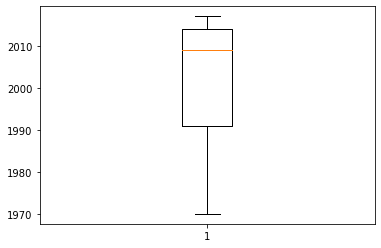

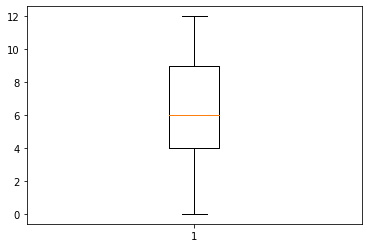

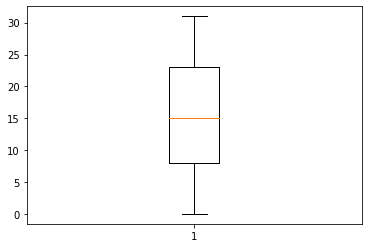

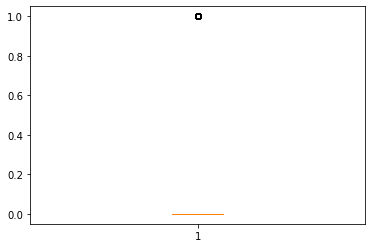

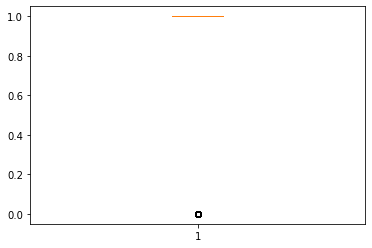

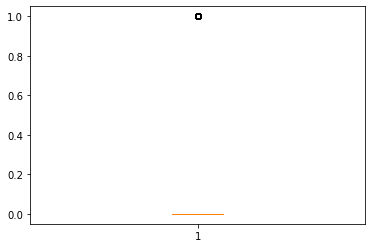

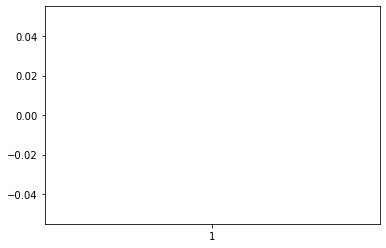

In [20]:
for col in num_columns.columns:       
    plt.boxplot(num_columns[col])
    plt.show()                         #Visualization for Numerical variables

In [21]:
cat_columns = df2.select_dtypes(include='object')       #Categorical Variables
cat_columns.head()

,Country,Region,City,Attack Type,Target Type,Attack Group,Weapon Type
0,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown
1,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown
2,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,Unknown
3,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
4,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary


# Analysis & Visualization For Each Categorical Variables

In [22]:
cat_columns['Country'].value_counts()

Iraq                   22180
Pakistan               13446
Afghanistan            12249
India                  11384
Colombia                7259
                       ...  
Wallis and Futuna          1
Antigua and Barbuda        1
Andorra                    1
South Vietnam              1
Vatican City               1
Name: Country, Length: 205, dtype: int64

In [23]:
print(len(df2.Country.unique()))
df2.Country.unique()   # There are 205 countries which are suffering from Terrorism

205


array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [24]:
print(len(df2['Region'].unique()))
df2['Region'].unique()  #There are 12 regional areas suffered from the Terrorism.

12


array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

Middle East & North Africa     46600
South Asia                     42563
Sub-Saharan Africa             16683
South America                  15736
Western Europe                 14534
Southeast Asia                 11722
Central America & Caribbean     8735
Eastern Europe                  4906
North America                   3192
East Asia                        675
Central Asia                     547
Australasia & Oceania            269
Name: Region, dtype: int64


<AxesSubplot:>

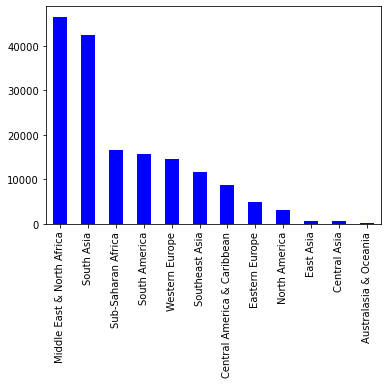

In [25]:
print(df2['Region'].value_counts())
df2['Region'].value_counts().plot(kind='bar',color='Blue')

Here, Middle East & North Africa Region got attacked most times by Terrorists and Follow region are South Asia also suffered most times 

In [26]:
df2['City'].unique()

array(['Santo Domingo', 'Mexico city', 'Unknown', ..., 'Hungrum',
       'Ceelka Geelow', 'Kubentog'], dtype=object)

In [27]:
df2['City'].value_counts()    # Their are 36675 cities which are the suffering from Terrorism

Unknown             7782
Baghdad             6792
Karachi             2087
Mosul               1993
Belfast             1928
                    ... 
Dujaila district       1
Dhaliwal               1
Raikal                 1
Kharik                 1
Kubentog               1
Name: City, Length: 36674, dtype: int64

Terrorists attacked on Cities like 'Bagdad','karachi','Mosul','Belfast' and some unknown cities maximum number of times. 

In [28]:
print(len(df2['Attack Type'].unique()))    #Here,we come to know that 9 types of Attack Types done by Terrorists.
df2['Attack Type'].unique()

9


array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

Bombing/Explosion                      77956
Armed Assault                          40719
Assassination                          18612
Hostage Taking (Kidnapping)            10833
Facility/Infrastructure Attack          8800
Unknown                                 6773
Hostage Taking (Barricade Incident)      912
Unarmed Assault                          909
Hijacking                                648
Name: Attack Type, dtype: int64


<AxesSubplot:>

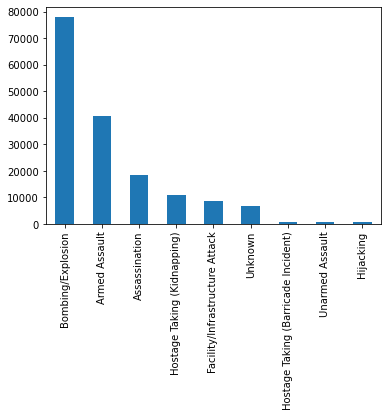

In [29]:
print(df2['Attack Type'].value_counts())
df2['Attack Type'].value_counts().plot(kind='bar')

From Above Visualization,we see that the terrorists are mostly using Bombs,Explosive items,Armed Assault,Assassinations,Kidnaping, Attacks on Infrastructure

In [30]:
print(len(df2['Target Type'].unique()))
df2['Target Type'].unique()                     #Terrorists use 22 Targets for attacking.

22


array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

Private Citizens & Property       39771
Military                          27084
Police                            23374
Government (General)              19831
Business                          17613
Transportation                     5961
Unknown                            4946
Religious Figures/Institutions     4158
Educational Institution            3983
Utilities                          3948
Government (Diplomatic)            3403
Terrorists/Non-State Militia       2962
Journalists & Media                2808
Violent Political Party            1767
Airports & Aircraft                1297
NGO                                 947
Telecommunication                   880
Tourists                            425
Maritime                            336
Food or Water Supply                294
Abortion Related                    243
Other                               131
Name: Target Type, dtype: int64


<AxesSubplot:>

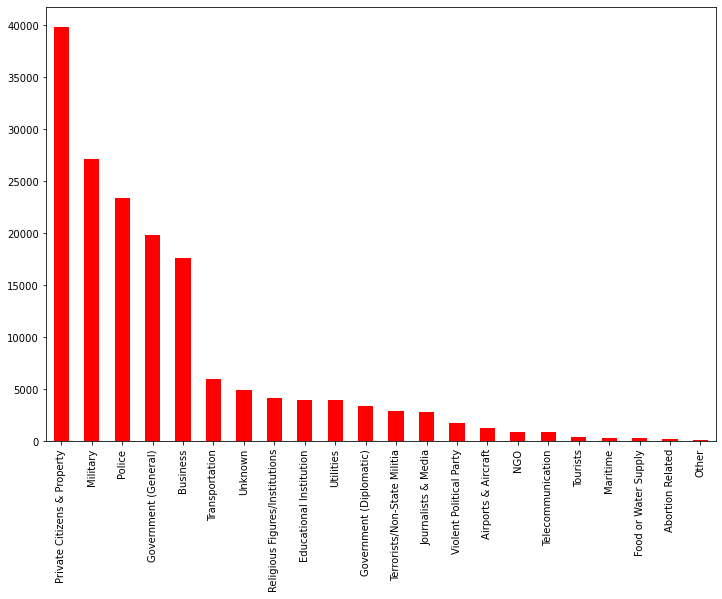

In [31]:
print(df2['Target Type'].value_counts())
plt.figure(figsize=(12,8))
df2['Target Type'].value_counts().plot(kind='bar',color='Red') 

Terrorists are attacked most on Private Citizens & Property,Military,Police and Government

In [32]:
df2['Attack Group'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [33]:
print(len(df2['Attack Group'].value_counts()))
print(df2['Attack Group'].value_counts())

3537
Unknown                                               76915
Taliban                                                7180
Islamic State of Iraq and the Levant (ISIL)            4893
Shining Path (SL)                                      3536
Al-Shabaab                                             3175
                                                      ...  
Al-Sunni muslim sect                                      1
Crazy Brabant Killers                                     1
Youth Gang                                                1
Proletarian Initiative and Offensive for W. Europe        1
MANO-D                                                    1
Name: Attack Group, Length: 3537, dtype: int64


The Above Analysis tells that most of the attacks are done by 'Unknown Group','Taliban','ISIL','SL', 'Al-Shabaab'.

In [34]:
df2['Weapon Type'].unique() 

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

The names of the weapons used by the Terrorists are mentioned Above

Explosives                                                                     82074
Firearms                                                                       56603
Unknown                                                                        14210
Incendiary                                                                      9015
Melee                                                                           3501
Chemical                                                                         304
Sabotage Equipment                                                               135
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      135
Other                                                                            110
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

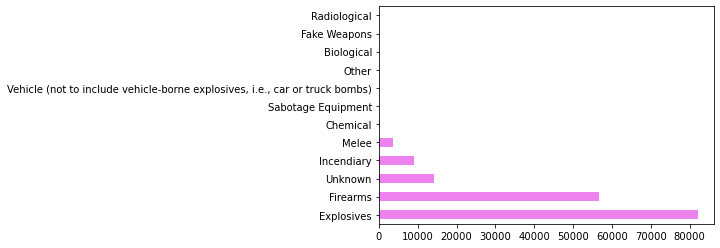

In [35]:
print(df2['Weapon Type'].value_counts())
df2['Weapon Type'].value_counts().plot(kind='barh',color='violet')
plt.show()

#The weapons like Explosives,Firearms,Unknown weapons are used most by Terrorists. Data Visualization for above Analysis

In [36]:
pd.crosstab(index=df2['Region'],columns=df2['Attack Type'],values=df2['No. of killings'],aggfunc='sum')

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
Australasia & Oceania,78.0,34.0,9.0,0.0,0.0,6.0,7.0,1.0,15.0
Central America & Caribbean,23111.0,1632.0,2601.0,118.0,4.0,59.0,263.0,23.0,685.0
Central Asia,399.0,138.0,347.0,1.0,14.0,6.0,10.0,16.0,63.0
East Asia,605.0,43.0,382.0,32.0,9.0,19.0,4.0,26.0,8.0
Eastern Europe,1993.0,376.0,3689.0,33.0,57.0,667.0,175.0,11.0,324.0
Middle East & North Africa,25791.0,4717.0,78606.0,788.0,123.0,1115.0,12570.0,145.0,10179.0
North America,745.0,238.0,598.0,64.0,3005.0,81.0,67.0,16.0,10.0
South America,16344.0,4024.0,4113.0,234.0,16.0,36.0,1066.0,75.0,1980.0
South Asia,38331.0,6452.0,41075.0,559.0,142.0,795.0,4135.0,79.0,8080.0


<AxesSubplot:xlabel='Region'>

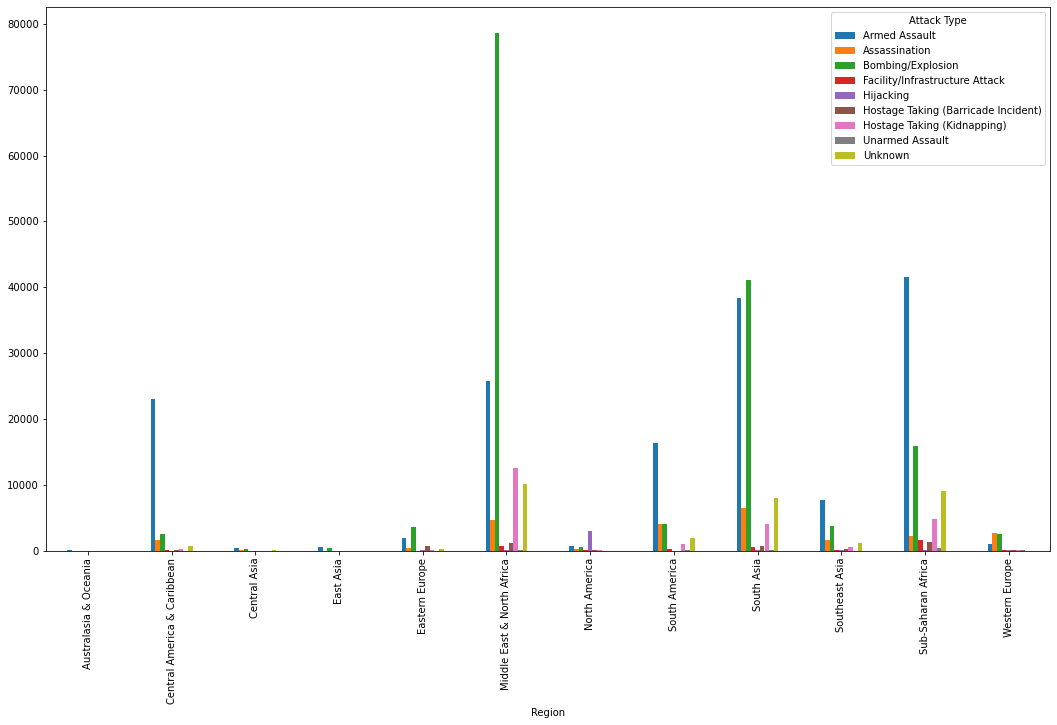

In [37]:
Table_Graph=pd.crosstab(index=df2['Region'],columns=df2['Attack Type'],values=df2['No. of killings'],aggfunc='sum').plot(kind='bar',figsize=(18,10))
Table_Graph

Data Visualization for above Analysis

In [38]:
pd.crosstab(index=df2['Region'],columns=df2['Target Type'],values=df2['No. of killings'],aggfunc='sum')

Target Type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,NaN,1.0,15.0,0.0,0.0,2.0,28.0,0.0,0.0,36.0,...,42.0,16.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,10.0
Central America & Caribbean,NaN,123.0,899.0,144.0,1.0,83.0,933.0,72.0,13.0,19008.0,...,1078.0,4518.0,93.0,59.0,114.0,20.0,529.0,340.0,416.0,37.0
Central Asia,NaN,4.0,26.0,3.0,22.0,22.0,103.0,8.0,12.0,204.0,...,170.0,268.0,16.0,0.0,27.0,1.0,85.0,2.0,2.0,NaN
East Asia,NaN,34.0,176.0,11.0,0.0,3.0,106.0,2.0,0.0,13.0,...,190.0,405.0,2.0,0.0,5.0,3.0,174.0,2.0,0.0,2.0
Eastern Europe,NaN,494.0,341.0,412.0,1.0,24.0,607.0,43.0,NaN,2189.0,...,1233.0,1265.0,87.0,2.0,25.0,14.0,481.0,62.0,33.0,2.0
Middle East & North Africa,NaN,619.0,9427.0,1115.0,67.0,639.0,6507.0,602.0,134.0,33395.0,...,16738.0,48082.0,5067.0,21.0,4876.0,405.0,3010.0,1358.0,649.0,1017.0
North America,9.0,356.0,273.0,51.0,0.0,11.0,481.0,55.0,2.0,63.0,...,204.0,3218.0,53.0,2.0,2.0,11.0,3.0,15.0,0.0,11.0
South America,0.0,198.0,1449.0,96.0,17.0,100.0,2244.0,123.0,49.0,8131.0,...,4352.0,9418.0,355.0,21.0,400.0,37.0,394.0,288.0,191.0,2.0
South Asia,NaN,298.0,4026.0,875.0,44.0,619.0,8776.0,242.0,204.0,21015.0,...,22127.0,26702.0,4033.0,32.0,1883.0,109.0,5302.0,1469.0,88.0,1397.0


In [39]:
pd.crosstab(index=df2['Country'],columns=df2['Attack Type'],values=df2['No. of killings'],aggfunc='sum')

Attack Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Country,,,,,,,,,
Afghanistan,12972.0,1556.0,16674.0,219.0,29.0,222.0,2176.0,33.0,4837.0
Albania,16.0,9.0,14.0,0.0,NaN,NaN,0.0,0.0,2.0
Algeria,6289.0,552.0,2634.0,17.0,8.0,69.0,208.0,1.0,1185.0
Andorra,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,1780.0,29.0,401.0,97.0,NaN,0.0,155.0,0.0,566.0
...,...,...,...,...,...,...,...,...,...
Yemen,1732.0,524.0,4024.0,28.0,8.0,84.0,475.0,0.0,1527.0
Yugoslavia,65.0,17.0,34.0,0.0,0.0,NaN,0.0,NaN,3.0
Zaire,122.0,2.0,14.0,0.0,NaN,NaN,1.0,NaN,185.0


<AxesSubplot:ylabel='Country'>

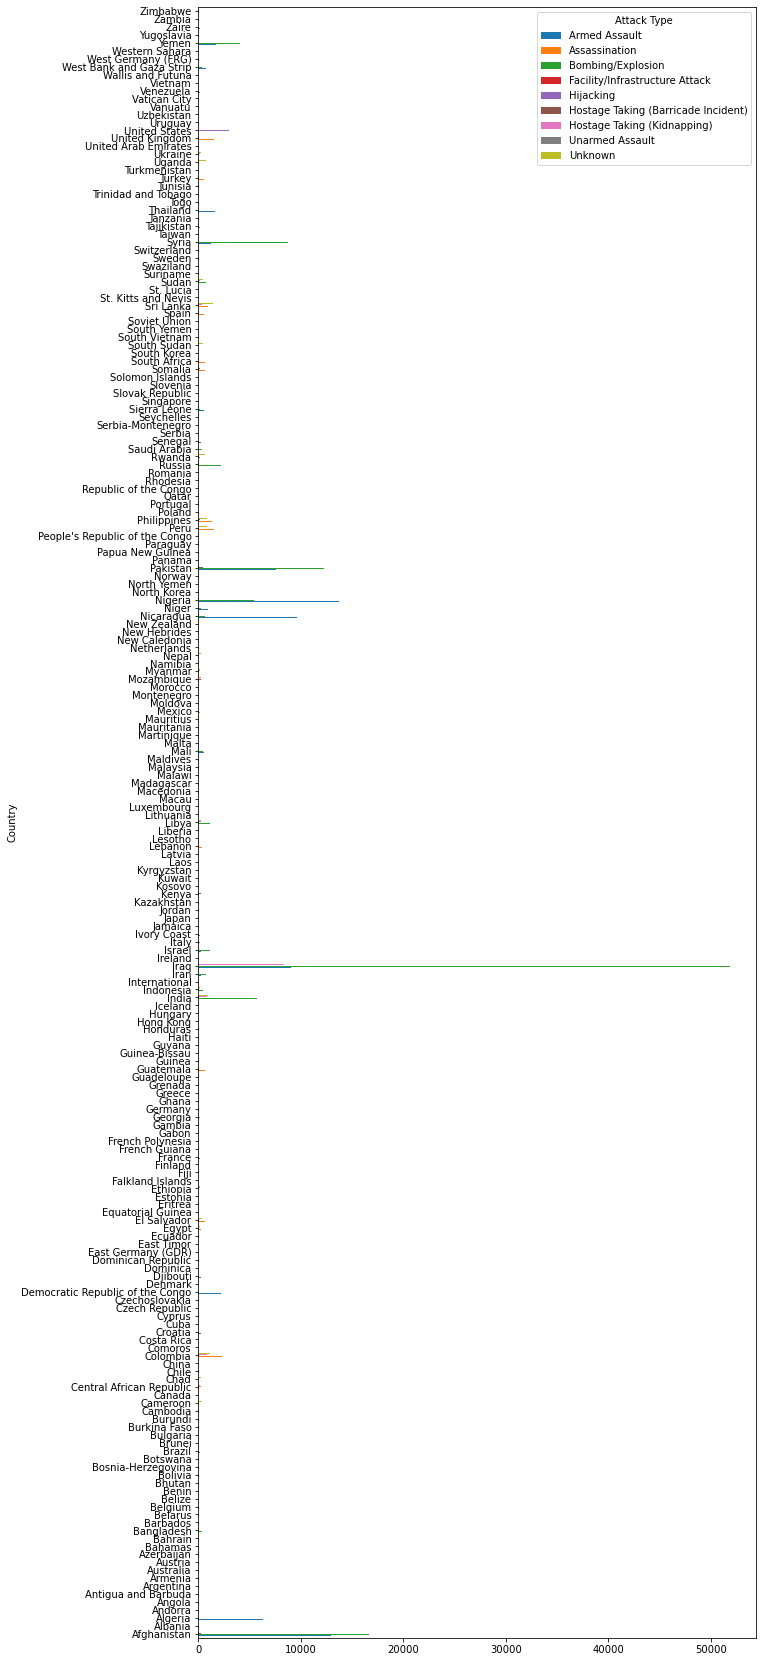

In [40]:
pd.crosstab(index=df2['Country'],columns=df2['Attack Type'],values=df2['No. of killings'],aggfunc='sum').plot(kind='barh',figsize=(10,30))


The Countries like Iraq, Afganistan, USA,Yemen,Syria,Russia,Pakistan,Nigeria,Nicaragua, India, Algeria, Columbia are the countries suffered most.Terrorists attacked maximum times on this countries using weapons,Explosive Bombs, Hijacking and Assassination.

In [41]:
pd.crosstab(index=df2['Region'],columns=df2['Target Type'],values=df2['No. of killings'],aggfunc='sum')

Target Type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,NaN,1.0,15.0,0.0,0.0,2.0,28.0,0.0,0.0,36.0,...,42.0,16.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,10.0
Central America & Caribbean,NaN,123.0,899.0,144.0,1.0,83.0,933.0,72.0,13.0,19008.0,...,1078.0,4518.0,93.0,59.0,114.0,20.0,529.0,340.0,416.0,37.0
Central Asia,NaN,4.0,26.0,3.0,22.0,22.0,103.0,8.0,12.0,204.0,...,170.0,268.0,16.0,0.0,27.0,1.0,85.0,2.0,2.0,NaN
East Asia,NaN,34.0,176.0,11.0,0.0,3.0,106.0,2.0,0.0,13.0,...,190.0,405.0,2.0,0.0,5.0,3.0,174.0,2.0,0.0,2.0
Eastern Europe,NaN,494.0,341.0,412.0,1.0,24.0,607.0,43.0,NaN,2189.0,...,1233.0,1265.0,87.0,2.0,25.0,14.0,481.0,62.0,33.0,2.0
Middle East & North Africa,NaN,619.0,9427.0,1115.0,67.0,639.0,6507.0,602.0,134.0,33395.0,...,16738.0,48082.0,5067.0,21.0,4876.0,405.0,3010.0,1358.0,649.0,1017.0
North America,9.0,356.0,273.0,51.0,0.0,11.0,481.0,55.0,2.0,63.0,...,204.0,3218.0,53.0,2.0,2.0,11.0,3.0,15.0,0.0,11.0
South America,0.0,198.0,1449.0,96.0,17.0,100.0,2244.0,123.0,49.0,8131.0,...,4352.0,9418.0,355.0,21.0,400.0,37.0,394.0,288.0,191.0,2.0
South Asia,NaN,298.0,4026.0,875.0,44.0,619.0,8776.0,242.0,204.0,21015.0,...,22127.0,26702.0,4033.0,32.0,1883.0,109.0,5302.0,1469.0,88.0,1397.0


Region
Australasia & Oceania             150.0
Central America & Caribbean     28496.0
Central Asia                      994.0
East Asia                        1128.0
Eastern Europe                   7325.0
Middle East & North Africa     134034.0
North America                    4824.0
South America                   27888.0
South Asia                      99648.0
Southeast Asia                  15344.0
Sub-Saharan Africa              76957.0
Western Europe                   6615.0
Name: No. of killings, dtype: float64


<AxesSubplot:ylabel='Region'>

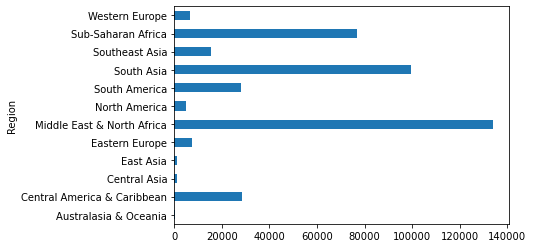

In [42]:
print(df2.groupby('Region')['No. of killings'].sum())
df2.groupby('Region')['No. of killings'].sum().plot(kind='barh')

From above Analysis,the maximum number of people Middle East& North Africa,South-Asia,Sub-Saharan Africa & Central America & Caribbean 

<AxesSubplot:xlabel='Attack Type'>

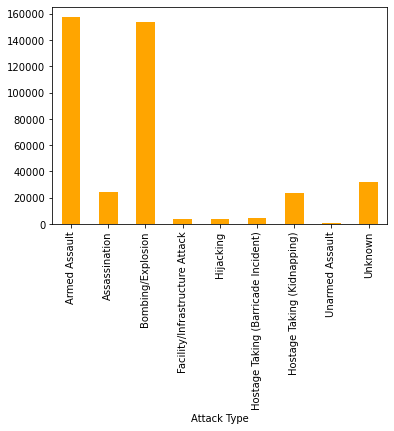

In [43]:
df2.groupby('Attack Type')['No. of killings'].sum().plot(kind='bar',color='Orange')

The Above graph tells that because of Armed Assault,Bombing/Explosion,Assassination and Kidnaping by terrorists,lakhs of People got died

In [47]:
df2.groupby(by='Year')[['Suicide','No. of killings']].sum()

,Suicide,No. of killings
Year,,
1970,0,173.0
1971,0,172.0
1972,0,554.0
1973,0,366.0
1974,0,533.0
1975,0,612.0
1976,0,673.0
1977,0,456.0
1978,0,1450.0


In [46]:
df2['No. of killings'].sum(axis=0)

403403.0

The Above table tells that how many people are died during 1970 to 2017 because of terrorism.Terrorism got increased rapidly from 2000 year.Hundreds,thousands of people are died because of terrorism.Terrorists are killing very brutally so many innocent lives.From 1970 to 2017 year,the total number of people died because of terrorism is '4,03,403'.

<AxesSubplot:xlabel='Year'>

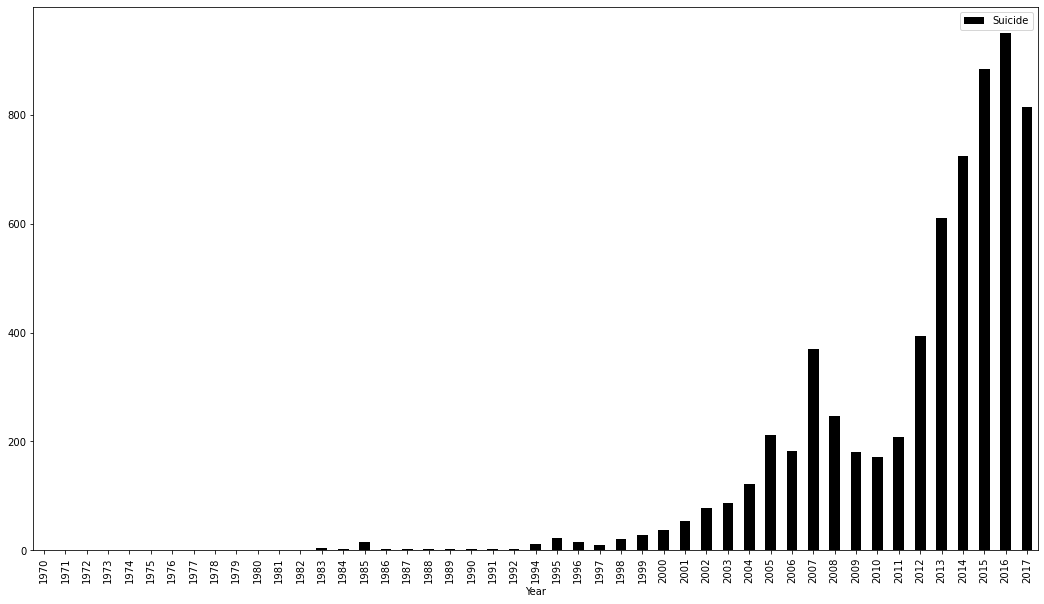

In [48]:
df2.groupby('Year')[['Region','Suicide']].sum().plot(kind='bar',figsize=(18,10),color='black')

The Above bar graph tells that suicide attack deaths between 1970-1980 period zero;from 1980-2000 period suicide death attack are <50;2000-2017 period suicide death death increased rapidly(100 times).

In [ ]:
df2.groupby('Year')[['Region','No. of killings']].sum().plot(kind='bar',figsize=(18,10))

# Conclusion:

In the above Analysis, we analyzed about the terrorism data between the period of 1970 to 2017 year.  
Every year atleast 500-5000 died between 1970-1982 and from 1982-2017 period the deaths are increased rapidly.

Aa per data,205 countries suffered from Terrorism.Around the globe 12 regions have suffered from it and thousands of innocent lives died.From 1970 to 2017 year,the total number of people died because of terrorism is "4,03,403".Lakhs of victims are their around the earth,suicide attack deaths also increased by every year.Terrorists main target is on 'Private Citizens & Property','Military','Police and Government','Religious figures','Transportation'.

Countries like 'Iraq', 'Afganistan','USA','Yemen','Syria','Russia','Pakistan','Nigeria','Nicaragua', 'India', 'Algeria', 'Columbia' are the countries suffered most.Terrorists attacked maximum times on this countries using Weapons,Explosive Bombs, Hijacking and Assassination.that most of the attacks are done by 'Unknown Group','Taliban','ISIL','SL','Al-Shabaab'.

Here, 'Middle East & North Africa' Region got attacked most times by Terrorists and Followed region are 'South Asia' also suffered most times.Terrorists attacked on Cities like 'Bagdad','karachi','Mosul','Belfast' and some unknown cities maximum number of times.

we see that the terrorists are mostly using 'Bombs','Explosive items','ArmedAssault','Assassinations','Kidnaping','Attacks on Infrastructure'.

